In [138]:
# import importamt packages
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# automatically show the graphs
%matplotlib inline

In [139]:
# check tensorflow version
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.6.0


In [140]:
# read the data sheet
dataframe = pd.read_csv("sogeh_aggcountrydata_allyears.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Columns: 1055 entries, Year to Unnamed: 1054
dtypes: float64(1052), object(3)
memory usage: 11.5+ MB


C:\Users\chenx\AppData\Local\Temp\ipykernel_18820\4197491708.py:2: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("sogeh_aggcountrydata_allyears.csv")


In [141]:
# show data
dataframe.head()

,Year,Region,Subregion,Gender,sog_w2_wrrd_food_yes,sog_w2_wrrd_food_no,sog_w2_unsafe_strag_ag,sog_w2_unsafe_neutral,sog_w2_unsafe_strdis_dis,sog_w2_wrk_yes,...,Unnamed: 1045,Unnamed: 1046,Unnamed: 1047,Unnamed: 1048,Unnamed: 1049,Unnamed: 1050,Unnamed: 1051,Unnamed: 1052,Unnamed: 1053,Unnamed: 1054
0,2020.0,South Asia,Afghanistan,Female,25.0,75.0,17.0,14.0,69.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,South Asia,Afghanistan,Male,23.0,77.0,16.0,11.0,73.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,South Asia,Afghanistan,Combined,24.0,76.0,17.0,13.0,71.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.0,South Asia,Afghanistan,Female,63.0,37.0,85.0,9.0,6.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021.0,South Asia,Afghanistan,Male,67.0,33.0,79.0,9.0,12.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# trim the data
data=dataframe.iloc[:,3:20]
data

,Gender,sog_w2_wrrd_food_yes,sog_w2_wrrd_food_no,sog_w2_unsafe_strag_ag,sog_w2_unsafe_neutral,sog_w2_unsafe_strdis_dis,sog_w2_wrk_yes,sog_w2_wrk_no,sog_w2_dcd_prchs_self,sog_w2_dom_tsks_anml,sog_w2_dom_tsks_bus,sog_w2_dom_tsks_clean,sog_w2_dom_tsks_meal,sog_w2_dom_tsks_farm,sog_w2_dom_tsks_hshld,sog_w2_dom_tsks_none,sog_w2_dom_tsks_shop
0,Female,25.0,75.0,17.0,14.0,69.0,54.0,46.0,33.0,46.0,9.0,87.0,77.0,4.0,64.0,2.0,68.0
1,Male,23.0,77.0,16.0,11.0,73.0,59.0,41.0,31.0,37.0,12.0,74.0,65.0,8.0,59.0,4.0,60.0
2,Combined,24.0,76.0,17.0,13.0,71.0,56.0,44.0,32.0,42.0,11.0,81.0,72.0,6.0,62.0,3.0,65.0
3,Female,63.0,37.0,85.0,9.0,6.0,56.0,44.0,19.0,8.0,18.0,39.0,45.0,4.0,27.0,8.0,20.0
4,Male,67.0,33.0,79.0,9.0,12.0,65.0,35.0,37.0,8.0,27.0,14.0,15.0,10.0,31.0,14.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# trim the data
data=data[0:600]

In [144]:
data

,Gender,sog_w2_wrrd_food_yes,sog_w2_wrrd_food_no,sog_w2_unsafe_strag_ag,sog_w2_unsafe_neutral,sog_w2_unsafe_strdis_dis,sog_w2_wrk_yes,sog_w2_wrk_no,sog_w2_dcd_prchs_self,sog_w2_dom_tsks_anml,sog_w2_dom_tsks_bus,sog_w2_dom_tsks_clean,sog_w2_dom_tsks_meal,sog_w2_dom_tsks_farm,sog_w2_dom_tsks_hshld,sog_w2_dom_tsks_none,sog_w2_dom_tsks_shop
0,Female,25.0,75.0,17.0,14.0,69.0,54.0,46.0,33.0,46.0,9.0,87.0,77.0,4.0,64.0,2.0,68.0
1,Male,23.0,77.0,16.0,11.0,73.0,59.0,41.0,31.0,37.0,12.0,74.0,65.0,8.0,59.0,4.0,60.0
2,Combined,24.0,76.0,17.0,13.0,71.0,56.0,44.0,32.0,42.0,11.0,81.0,72.0,6.0,62.0,3.0,65.0
3,Female,63.0,37.0,85.0,9.0,6.0,56.0,44.0,19.0,8.0,18.0,39.0,45.0,4.0,27.0,8.0,20.0
4,Male,67.0,33.0,79.0,9.0,12.0,65.0,35.0,37.0,8.0,27.0,14.0,15.0,10.0,31.0,14.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Male,48.0,52.0,31.0,10.0,59.0,53.0,47.0,28.0,14.0,27.0,30.0,30.0,13.0,55.0,9.0,61.0
596,Combined,52.0,52.0,29.0,11.0,60.0,48.0,52.0,26.0,14.0,24.0,46.0,43.0,11.0,49.0,7.0,60.0
597,Female,30.0,70.0,22.0,13.0,65.0,59.0,41.0,34.0,22.0,9.0,84.0,51.0,9.0,32.0,4.0,69.0
598,Male,30.0,70.0,21.0,28.0,51.0,79.0,21.0,60.0,36.0,24.0,45.0,40.0,16.0,44.0,5.0,59.0


In [145]:
# check if the data is clean
data.isnull().sum()

Gender                       0
sog_w2_wrrd_food_yes        60
sog_w2_wrrd_food_no         60
sog_w2_unsafe_strag_ag      60
sog_w2_unsafe_neutral       60
sog_w2_unsafe_strdis_dis    60
sog_w2_wrk_yes              60
sog_w2_wrk_no               60
sog_w2_dcd_prchs_self       60
sog_w2_dom_tsks_anml        60
sog_w2_dom_tsks_bus         60
sog_w2_dom_tsks_clean       60
sog_w2_dom_tsks_meal        60
sog_w2_dom_tsks_farm        60
sog_w2_dom_tsks_hshld       60
sog_w2_dom_tsks_none        60
sog_w2_dom_tsks_shop        60
dtype: int64

In [146]:
# trim the data
data.dropna(axis=0,inplace=True)

C:\Users\chenx\AppData\Local\Temp\ipykernel_18820\4125289344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0,inplace=True)


In [147]:
# check if the data is clean
data.isnull().sum()

Gender                      0
sog_w2_wrrd_food_yes        0
sog_w2_wrrd_food_no         0
sog_w2_unsafe_strag_ag      0
sog_w2_unsafe_neutral       0
sog_w2_unsafe_strdis_dis    0
sog_w2_wrk_yes              0
sog_w2_wrk_no               0
sog_w2_dcd_prchs_self       0
sog_w2_dom_tsks_anml        0
sog_w2_dom_tsks_bus         0
sog_w2_dom_tsks_clean       0
sog_w2_dom_tsks_meal        0
sog_w2_dom_tsks_farm        0
sog_w2_dom_tsks_hshld       0
sog_w2_dom_tsks_none        0
sog_w2_dom_tsks_shop        0
dtype: int64

In [148]:
# check if the data is biased
data.iloc[:,0:1].value_counts()

Gender  
Combined    180
Female      180
Male        180
dtype: int64

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 599
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    540 non-null    object 
 1   sog_w2_wrrd_food_yes      540 non-null    float64
 2   sog_w2_wrrd_food_no       540 non-null    float64
 3   sog_w2_unsafe_strag_ag    540 non-null    float64
 4   sog_w2_unsafe_neutral     540 non-null    float64
 5   sog_w2_unsafe_strdis_dis  540 non-null    float64
 6   sog_w2_wrk_yes            540 non-null    float64
 7   sog_w2_wrk_no             540 non-null    float64
 8   sog_w2_dcd_prchs_self     540 non-null    float64
 9   sog_w2_dom_tsks_anml      540 non-null    float64
 10  sog_w2_dom_tsks_bus       540 non-null    float64
 11  sog_w2_dom_tsks_clean     540 non-null    float64
 12  sog_w2_dom_tsks_meal      540 non-null    float64
 13  sog_w2_dom_tsks_farm      540 non-null    float64
 14  sog_w2_dom

In [150]:
x = data.iloc[:,1:]

In [151]:
x.head()

,sog_w2_wrrd_food_yes,sog_w2_wrrd_food_no,sog_w2_unsafe_strag_ag,sog_w2_unsafe_neutral,sog_w2_unsafe_strdis_dis,sog_w2_wrk_yes,sog_w2_wrk_no,sog_w2_dcd_prchs_self,sog_w2_dom_tsks_anml,sog_w2_dom_tsks_bus,sog_w2_dom_tsks_clean,sog_w2_dom_tsks_meal,sog_w2_dom_tsks_farm,sog_w2_dom_tsks_hshld,sog_w2_dom_tsks_none,sog_w2_dom_tsks_shop
0,25.0,75.0,17.0,14.0,69.0,54.0,46.0,33.0,46.0,9.0,87.0,77.0,4.0,64.0,2.0,68.0
1,23.0,77.0,16.0,11.0,73.0,59.0,41.0,31.0,37.0,12.0,74.0,65.0,8.0,59.0,4.0,60.0
2,24.0,76.0,17.0,13.0,71.0,56.0,44.0,32.0,42.0,11.0,81.0,72.0,6.0,62.0,3.0,65.0
3,63.0,37.0,85.0,9.0,6.0,56.0,44.0,19.0,8.0,18.0,39.0,45.0,4.0,27.0,8.0,20.0
4,67.0,33.0,79.0,9.0,12.0,65.0,35.0,37.0,8.0,27.0,14.0,15.0,10.0,31.0,14.0,43.0


In [152]:
y = data.iloc[:,0:1]

In [153]:
y

,Gender
0,Female
1,Male
2,Combined
3,Female
4,Male
...,...
595,Male
596,Combined
597,Female
598,Male


In [154]:
# lable encoding
y = y.replace("Male", 1)
y = y.replace("Female", 0)
y = y.replace("Combined", 0)

In [155]:
y

,Gender
0,0
1,1
2,0
3,0
4,1
...,...
595,1
596,0
597,0
598,1


In [156]:
model = tf.keras.Sequential()

### The first layer, 6 neurons, the input demention is 16, the activation function is the relu function

In [157]:
model.add(tf.keras.layers.Dense(6, input_shape=(16,), activation='relu'))

### The final layer, 1 output, use sigmoid as activation function

In [158]:
model.add(tf.keras.layers.Dense(4, activation='relu'))

### In this nerual network, there are 2 hidden layers

In [159]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

### The shape of the model:

In [160]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


### Use Adam as optimiser, and use binary crossentropy as the loss function

In [161]:
model.compile(optimizer='adagrad',
              loss='mse',#binary_crossentropy
              metrics=['acc']
)

### Train it for 100 times, collect the process in history

In [162]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2506 - acc: 0.7130
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2493 - acc: 0.7185
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2487 - acc: 0.7167
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2482 - acc: 0.7185
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2479 - acc: 0.7167
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2475 - acc: 0.7167
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2471 - acc: 0.7167
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2468 - acc: 0.7148
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2465 - acc: 0.7148
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2462 - acc: 0.7148
Epoch 11/100
17/17 [==============================] - 0s 2m

In [163]:
history.history.keys()

dict_keys(['loss', 'acc'])

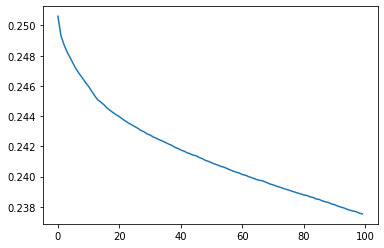

In [164]:
plt.plot(history.epoch, history.history.get('loss'))

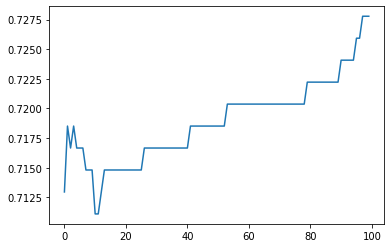

In [165]:
plt.plot(history.epoch, history.history.get('acc'))

In [166]:
test = data.iloc[:20,1:]

In [167]:
predicted_result = model.predict(test)
predicted_result

array([[0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.9006005 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.768038  ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.4826352 ],
       [0.68819827],
       [0.4826352 ],
       [0.4826352 ],
       [0.89592016]], dtype=float32)

In [168]:
i=0
while i<20:
    if predicted_result[i]<0.5:
        predicted_result[i]=0
    else:
        predicted_result[i]=1
    i=i+1
predicted_result

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [169]:
true_result = y.iloc[:20,0:1]
true_result

,Gender
0,0
1,1
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,0


# MLP multi-layer perception

# potential improvement CNN or Transformer